In [1]:
import os
import logging

#Standard Data Packages
import pandas as pd
import numpy as np

#Set TensorFlow logging level to suppress warnings
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
#Set absl logging level to suppress warnings
logging.getLogger('absl').setLevel(logging.ERROR)

#Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

#tf and keras
import tensorflow as tf
from keras import models
from keras import layers

#Scikit
from sklearn import metrics

## Load Dataset

In [2]:
train_set = pd.read_csv('../data/train_norm_set.csv')
val_set = pd.read_csv('../data/val_norm_set.csv')

In [3]:
features = ["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]

X_train = train_set[features]
Y_train = train_set["Exited"]

X_val = val_set[features]
Y_val = val_set["Exited"]

In [4]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.470,0,0,0.472973,0.2,0.000000,0.333333,1,1,0.459140
1,0.512,0,1,0.081081,0.2,0.000000,0.000000,0,1,0.454370
2,0.566,1,1,0.351351,0.1,0.473928,0.000000,1,0,0.238851
3,0.504,1,1,0.297297,0.2,0.597701,0.333333,1,1,0.413466
4,0.590,0,1,0.175676,0.4,0.527510,0.000000,1,0,0.759450


In [5]:
X_train.dtypes

CreditScore        float64
Geography            int64
Gender               int64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [6]:
#change all features' types to float64 for model
X_train = X_train.astype('float64')
X_val = X_val.astype('float64')

In [7]:
X_train.dtypes

CreditScore        float64
Geography          float64
Gender             float64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
dtype: object

## MNN Experiment 1

#### Build Model with Layers: Input (CreditScore) -> 32 -> 24 -> Output

In [13]:
def build_model1(learning_rate = 0.01):
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

    #add input layer
    input = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "CreditScore")

    #add dense layer 1
    hidden1 = tf.keras.layers.Dense(units = 32, activation = "relu", name = "hidden1")(input)
    
    #add dense layer 2
    hidden2 = tf.keras.layers.Dense(units = 24, activation = "relu", name = "hidden2")(hidden1)

    #add output layer
    dx = tf.keras.layers.Dense(units = 1, activation = "sigmoid", name = "Dx")(hidden2)
    
    #configure model
    model = tf.keras.Model(inputs = input, outputs = dx, name = "model1")

    #configure optimizer
    optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
    
    model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
    
    return model

#### Fit and Evaluate

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CreditScore (InputLayer)    [(None, 1)]               0         
                                                                 
 hidden1 (Dense)             (None, 32)                64        
                                                                 
 hidden2 (Dense)             (None, 24)                792       
                                                                 
 Dx (Dense)                  (None, 1)                 25        
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


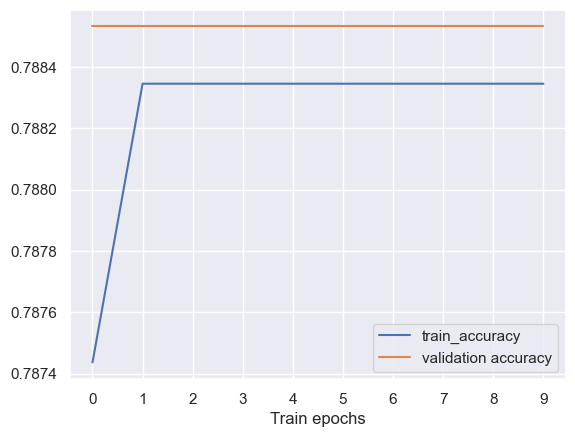

,loss,accuracy,val_loss,val_accuracy
0,0.520483,0.787436,0.515531,0.788532
1,0.515862,0.788345,0.515505,0.788532
2,0.515843,0.788345,0.515620,0.788532
3,0.515822,0.788345,0.515491,0.788532
4,0.515820,0.788345,0.515555,0.788532
5,0.515789,0.788345,0.515477,0.788532
6,0.515815,0.788345,0.515477,0.788532
7,0.515782,0.788345,0.515464,0.788532
8,0.515804,0.788345,0.515507,0.788532
9,0.515815,0.788345,0.515480,0.788532


In [14]:
num_epochs = 10

#build model
model1 = build_model1(learning_rate = 0.01)
model1.summary()

#fit model on train data and evaluate on validation data
history = model1.fit(
    x = X_train[["CreditScore"]],
    y = Y_train,
    epochs = num_epochs,
    batch_size = 32,
    validation_data = (
        X_val[["CreditScore"]],
        Y_val),
    verbose = 0)

#print and plot results
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
plt.plot(train_accuracy, label = "train_accuracy")
plt.plot(val_accuracy, label = "validation accuracy")
plt.xticks(range(num_epochs))
plt.xlabel("Train epochs")
plt.legend()
plt.show()

history = pd.DataFrame(history.history)
display(history)

#### Make Predictions and Evaluate on Validation Data

1548/1548 [==============================] - 0s 222us/step
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     39041
           1       0.00      0.00      0.00     10470

    accuracy                           0.79     49511
   macro avg       0.39      0.50      0.44     49511
weighted avg       0.62      0.79      0.70     49511



/Users/albertkao/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/albertkao/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/albertkao/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

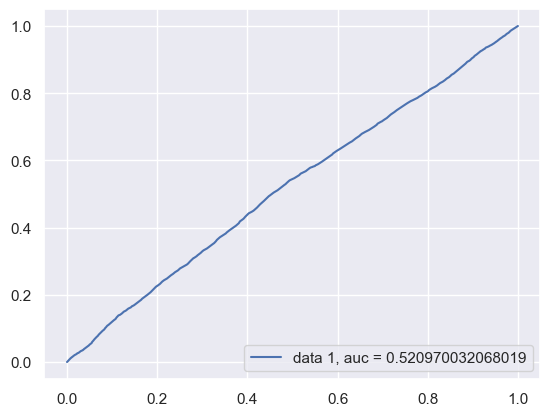

In [16]:
#make predictions
predict_val = model1.predict(X_val[["CreditScore"]])

#ROC Curve and AUC
fpr, tpr, _ = metrics.roc_curve(Y_val,  predict_val)
auc = metrics.roc_auc_score(Y_val, predict_val)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

#convert probability to labels
predict_val[predict_val <= 0.5] = 0
predict_val[predict_val > 0.5] = 1

#print metrics
print(metrics.classification_report(Y_val, predict_val))

plt.show()

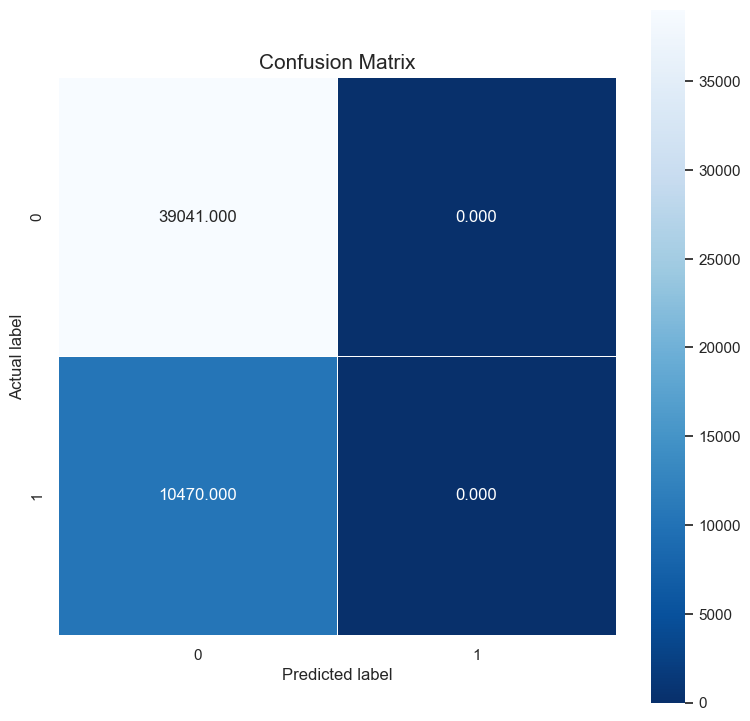

In [17]:
confusion_matrix = metrics.confusion_matrix(Y_val, predict_val)

plt.figure(figsize = (9,9))
sns.heatmap(confusion_matrix, annot = True, fmt = ".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size = 15)

plt.show()

## MNN Experiment 2

#### Build Model with Layers: Inputs (All Features) -> 32 -> 24 -> 12 -> Output

In [8]:
def build_model2(optimizer = "SGD", learning_rate = 0.01):
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

    #add inputs for all features
    credit_score = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "CreditScore")
    geography = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Geography")
    gender = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Gender")
    age = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Age")
    tenure = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Tenure")
    balance = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Balance")
    numProducts = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "NumOfProducts")
    crCard = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "HasCrCard")
    activeMember = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "IsActiveMember")
    salary = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "EstimatedSalary")

    #concatenate inputs
    features = tf.keras.layers.Concatenate()([credit_score, geography, gender, age, tenure, balance, numProducts, crCard, activeMember, salary])

    #add dense layer 1
    hidden1 = tf.keras.layers.Dense(units = 32, activation = "relu", name = "hidden1")(features)
    
    #add dense layer 2
    hidden2 = tf.keras.layers.Dense(units = 24, activation = "relu", name = "hidden2")(hidden1)

    #add dense layer 3
    hidden3 = tf.keras.layers.Dense(units = 12, activation = "relu", name = "hidden3")(hidden2)

    #add output layer
    dx = tf.keras.layers.Dense(units = 1, activation = "sigmoid", name = "Dx")(hidden3)
    
    #configure model
    model = tf.keras.Model(inputs = [credit_score, geography, gender, age, tenure, balance, numProducts, crCard, activeMember, salary], outputs = dx, name = "model2")

    #configure optimizer
    if optimizer == "SGD":
        optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
    elif optimizer == "Adam": #for testing
        optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    
    model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
    
    return model

#### Fit and Evaluate

Model: "model2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 CreditScore (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 Geography (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 Gender (InputLayer)            [(None, 1)]          0           []                               
                                                                                                  
 Age (InputLayer)               [(None, 1)]          0           []                               
                                                                                             

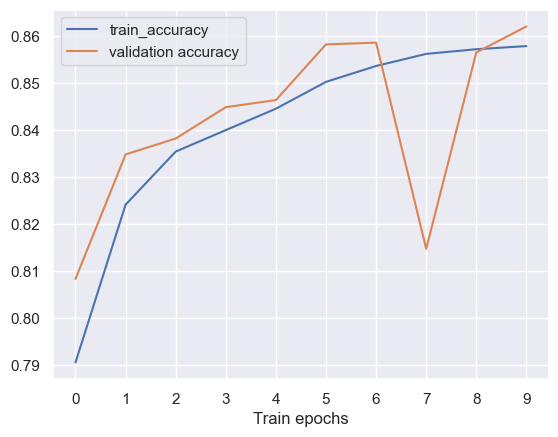

,loss,accuracy,val_loss,val_accuracy
0,0.466013,0.790483,0.429570,0.808265
1,0.413064,0.824070,0.395380,0.834764
2,0.390637,0.835375,0.388179,0.838157
3,0.375896,0.839945,0.366705,0.844822
4,0.361511,0.844499,0.358711,0.846337
5,0.349484,0.850212,0.340325,0.858193
6,0.343028,0.853596,0.337332,0.858557
7,0.339289,0.856167,0.398440,0.814688
8,0.337312,0.857163,0.340648,0.856476
9,0.335584,0.857829,0.331480,0.862010


In [10]:
num_epochs = 10
#build model
model2 = build_model2(optimizer = "SGD", learning_rate = 0.01)
model2.summary()

#fit on train data and evaluate on validation data
history = model2.fit(
    x = {
        "CreditScore": X_train[["CreditScore"]],
        "Geography": X_train[["Geography"]],
        "Gender": X_train[["Gender"]],
        "Age": X_train[["Age"]],
        "Tenure": X_train[["Tenure"]],
        "Balance": X_train[["Balance"]],
        "NumOfProducts": X_train[["NumOfProducts"]],
        "HasCrCard": X_train[["HasCrCard"]],
        "IsActiveMember": X_train[["IsActiveMember"]],
        "EstimatedSalary": X_train[["EstimatedSalary"]],
    },
    y = Y_train,
    epochs = num_epochs,
    batch_size = 32,
    validation_data = (
        {
            "CreditScore": X_val[["CreditScore"]],
            "Geography": X_val[["Geography"]],
            "Gender": X_val[["Gender"]],
            "Age": X_val[["Age"]],
            "Tenure": X_val[["Tenure"]],
            "Balance": X_val[["Balance"]],
            "NumOfProducts": X_val[["NumOfProducts"]],
            "HasCrCard": X_val[["HasCrCard"]],
            "IsActiveMember": X_val[["IsActiveMember"]],
            "EstimatedSalary": X_val[["EstimatedSalary"]],
        },
        Y_val),
    verbose = 0)

#print results
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
plt.plot(train_accuracy, label = "train_accuracy")
plt.plot(val_accuracy, label = "validation accuracy")
plt.xticks(range(num_epochs))
plt.xlabel("Train epochs")
plt.legend()
plt.show()

history = pd.DataFrame(history.history)
display(history)

#### Make Predictions and Evaluate on Validation Data

1548/1548 [==============================] - 1s 372us/step
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     39041
           1       0.77      0.49      0.60     10470

    accuracy                           0.86     49511
   macro avg       0.82      0.73      0.76     49511
weighted avg       0.85      0.86      0.85     49511



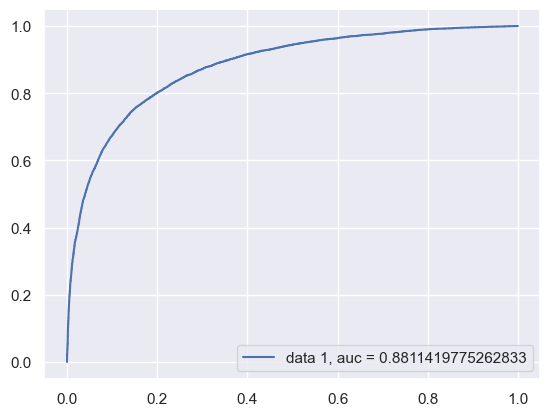

In [11]:
#make predictions
predict_val = model2.predict({
    "CreditScore": X_val[["CreditScore"]],
    "Geography": X_val[["Geography"]],
    "Gender": X_val[["Gender"]],
    "Age": X_val[["Age"]],
    "Tenure": X_val[["Tenure"]],
    "Balance": X_val[["Balance"]],
    "NumOfProducts": X_val[["NumOfProducts"]],
    "HasCrCard": X_val[["HasCrCard"]],
    "IsActiveMember": X_val[["IsActiveMember"]],
    "EstimatedSalary": X_val[["EstimatedSalary"]],
})

#ROC Curve and AUC
fpr, tpr, _ = metrics.roc_curve(Y_val,  predict_val)
auc = metrics.roc_auc_score(Y_val, predict_val)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

#convert probability to labels
predict_val[predict_val <= 0.5] = 0
predict_val[predict_val > 0.5] = 1

#print metrics
print(metrics.classification_report(Y_val, predict_val))

plt.show()

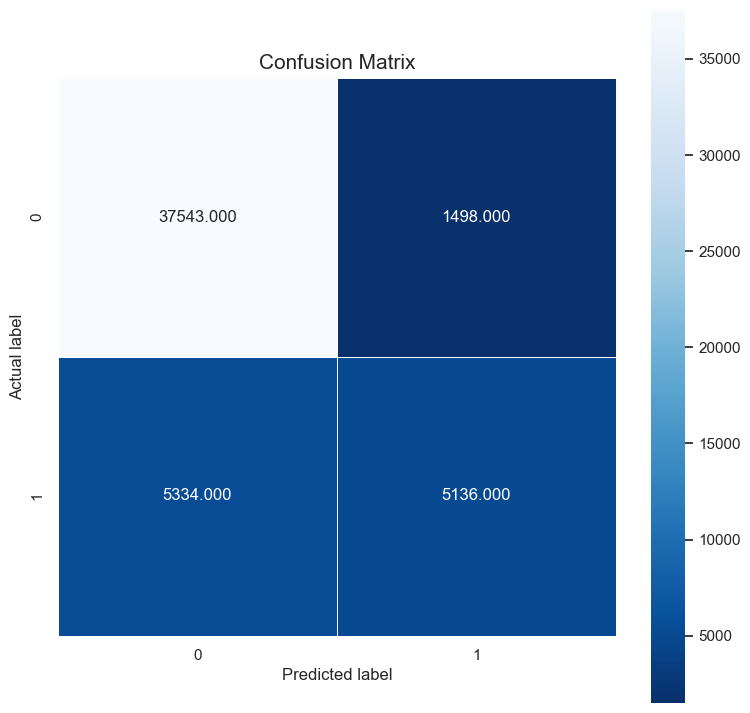

In [12]:
confusion_matrix = metrics.confusion_matrix(Y_val, predict_val)

plt.figure(figsize = (9,9))
sns.heatmap(confusion_matrix, annot = True, fmt = ".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size = 15)

plt.show()

## MNN Experiment 3

#### Build Model with Layers: Inputs (All Features) -> 64 -> 128 -> 254 -> 32 -> Output

In [13]:
def build_model3(optimizer = "SGD", learning_rate = 0.01):
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

    #add inputs for all features
    credit_score = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "CreditScore")
    geography = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Geography")
    gender = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Gender")
    age = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Age")
    tenure = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Tenure")
    balance = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "Balance")
    numProducts = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "NumOfProducts")
    crCard = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "HasCrCard")
    activeMember = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "IsActiveMember")
    salary = tf.keras.layers.Input(shape = (1, ), dtype = tf.float64, name = "EstimatedSalary")

    #concatenate inputs
    features = tf.keras.layers.Concatenate()([credit_score, geography, gender, age, tenure, balance, numProducts, crCard, activeMember, salary])

    #add dense layer 1
    hidden1 = tf.keras.layers.Dense(units = 64, activation = "relu", name = "hidden1")(features)

    #add dense layer 2
    hidden2 = tf.keras.layers.Dense(units = 128, activation = "relu", name = "hidden2")(hidden1)

    #add dense layer 3
    hidden3 = tf.keras.layers.Dense(units = 254, activation = "relu", name = "hidden4")(hidden2)

    #add dense layer 4
    hidden4 = tf.keras.layers.Dense(units = 32, activation = "relu", name = "hidden5")(hidden3)

    #add output layer
    dx = tf.keras.layers.Dense(units = 1, activation = "sigmoid", name = "Dx")(hidden4)
    
    #configure model
    model = tf.keras.Model(inputs = [credit_score, geography, gender, age, tenure, balance, numProducts, crCard, activeMember, salary], outputs = dx, name = "model3")

    #configure optimizer
    if optimizer == "SGD":
        optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
    elif optimizer == "Adam": #for testing
        optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    
    model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
    
    return model

#### Fit and Evaluate

Model: "model3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 CreditScore (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 Geography (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 Gender (InputLayer)            [(None, 1)]          0           []                               
                                                                                                  
 Age (InputLayer)               [(None, 1)]          0           []                               
                                                                                             

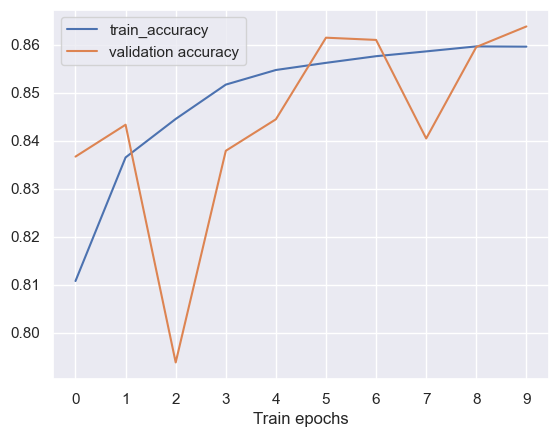

,loss,accuracy,val_loss,val_accuracy
0,0.438193,0.810730,0.389590,0.836663
1,0.382820,0.836491,0.367843,0.843308
2,0.360159,0.844507,0.436848,0.793763
3,0.345490,0.851666,0.367087,0.837874
4,0.340327,0.854713,0.364229,0.844439
5,0.336740,0.856202,0.330380,0.861445
6,0.335554,0.857587,0.330743,0.860980
7,0.333941,0.858591,0.361516,0.840439
8,0.332632,0.859630,0.333174,0.859506
9,0.331179,0.859578,0.325695,0.863788


In [14]:
#build model
model3 = build_model3(optimizer = "SGD", learning_rate = 0.01)
model3.summary()

#fit on train data and evaluate on validation data
history = model3.fit(
    x = {
        "CreditScore": X_train[["CreditScore"]],
        "Geography": X_train[["Geography"]],
        "Gender": X_train[["Gender"]],
        "Age": X_train[["Age"]],
        "Tenure": X_train[["Tenure"]],
        "Balance": X_train[["Balance"]],
        "NumOfProducts": X_train[["NumOfProducts"]],
        "HasCrCard": X_train[["HasCrCard"]],
        "IsActiveMember": X_train[["IsActiveMember"]],
        "EstimatedSalary": X_train[["EstimatedSalary"]],
    },
    y = Y_train,
    epochs = num_epochs,
    batch_size = 32,
    validation_data = (
        {
            "CreditScore": X_val[["CreditScore"]],
            "Geography": X_val[["Geography"]],
            "Gender": X_val[["Gender"]],
            "Age": X_val[["Age"]],
            "Tenure": X_val[["Tenure"]],
            "Balance": X_val[["Balance"]],
            "NumOfProducts": X_val[["NumOfProducts"]],
            "HasCrCard": X_val[["HasCrCard"]],
            "IsActiveMember": X_val[["IsActiveMember"]],
            "EstimatedSalary": X_val[["EstimatedSalary"]],
        },
        Y_val),
    verbose = 0)

#print results
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
plt.plot(train_accuracy, label = "train_accuracy")
plt.plot(val_accuracy, label = "validation accuracy")
plt.xticks(range(num_epochs))
plt.xlabel("Train epochs")
plt.legend()
plt.show()

history = pd.DataFrame(history.history)
display(history)

#### Make Predictions and Evaluate on Validation Data

1548/1548 [==============================] - 1s 423us/step
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     39041
           1       0.75      0.53      0.62     10470

    accuracy                           0.86     49511
   macro avg       0.82      0.74      0.77     49511
weighted avg       0.86      0.86      0.85     49511



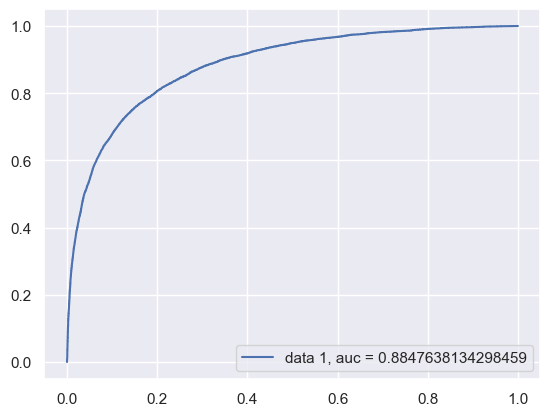

In [15]:
#make predictions
predict_val = model3.predict({
            "CreditScore": X_val[["CreditScore"]],
            "Geography": X_val[["Geography"]],
            "Gender": X_val[["Gender"]],
            "Age": X_val[["Age"]],
            "Tenure": X_val[["Tenure"]],
            "Balance": X_val[["Balance"]],
            "NumOfProducts": X_val[["NumOfProducts"]],
            "HasCrCard": X_val[["HasCrCard"]],
            "IsActiveMember": X_val[["IsActiveMember"]],
            "EstimatedSalary": X_val[["EstimatedSalary"]],
        })

#ROC Curve and AUC
fpr, tpr, _ = metrics.roc_curve(Y_val, predict_val)
auc = metrics.roc_auc_score(Y_val, predict_val)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

#convert probability to labels
predict_val[predict_val <= 0.5] = 0
predict_val[predict_val > 0.5] = 1

#print metrics
print(metrics.classification_report(Y_val, predict_val))

plt.show()

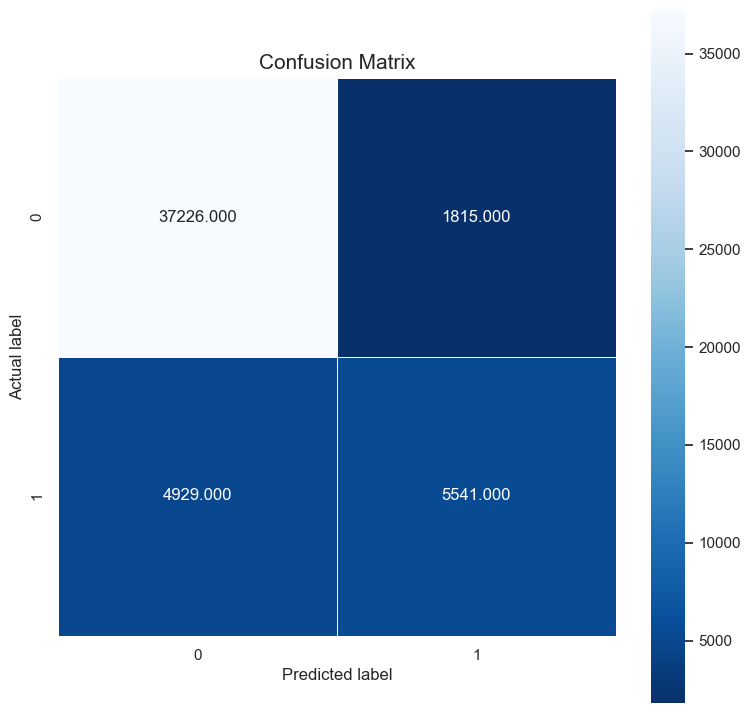

In [16]:
confusion_matrix = metrics.confusion_matrix(Y_val, predict_val)

plt.figure(figsize = (9,9))
sns.heatmap(confusion_matrix, annot = True, fmt = ".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size = 15)

plt.show()

## MNN Experiment 4 (undersampled balanced dataset)

#### Load Dataset

In [17]:
train_norm_balanced = pd.read_csv('../data/train_norm_balanced.csv')

X_train_balanced = train_norm_balanced[features]
Y_train_balanced = train_norm_balanced["Exited"]

#### Fit and Evaluate

Model: "model2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 CreditScore (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 Geography (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 Gender (InputLayer)            [(None, 1)]          0           []                               
                                                                                                  
 Age (InputLayer)               [(None, 1)]          0           []                               
                                                                                             

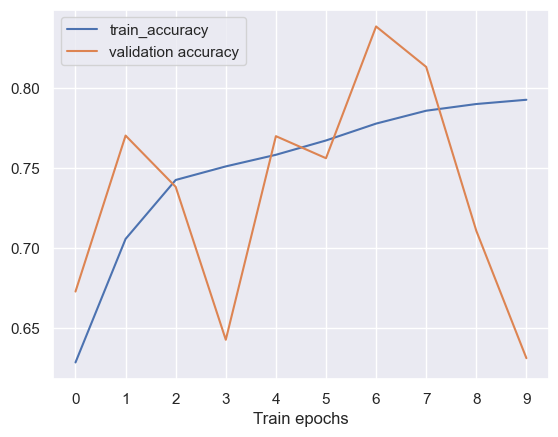

,loss,accuracy,val_loss,val_accuracy
0,0.646007,0.628461,0.602056,0.672800
1,0.566705,0.705718,0.496449,0.770354
2,0.527732,0.742587,0.532407,0.738280
3,0.515788,0.751074,0.681222,0.642645
4,0.502588,0.758333,0.498411,0.769991
5,0.487115,0.767290,0.513341,0.756196
6,0.470368,0.777841,0.383894,0.838602
7,0.456750,0.785898,0.415828,0.813294
8,0.448566,0.790090,0.582531,0.710812
9,0.444467,0.792749,0.723657,0.631132


In [18]:
#build model
model4 = build_model2(optimizer = "SGD", learning_rate = 0.01)
model4.summary()

#fit on train data and evaluate on validation data
history = model4.fit(
    x = {
        "CreditScore": X_train_balanced[["CreditScore"]],
        "Geography": X_train_balanced[["Geography"]],
        "Gender": X_train_balanced[["Gender"]],
        "Age": X_train_balanced[["Age"]],
        "Tenure": X_train_balanced[["Tenure"]],
        "Balance": X_train_balanced[["Balance"]],
        "NumOfProducts": X_train_balanced[["NumOfProducts"]],
        "HasCrCard": X_train_balanced[["HasCrCard"]],
        "IsActiveMember": X_train_balanced[["IsActiveMember"]],
        "EstimatedSalary": X_train_balanced[["EstimatedSalary"]],
    },
    y = Y_train_balanced,
    epochs = num_epochs,
    batch_size = 32,
    validation_data = (
        {
            "CreditScore": X_val[["CreditScore"]],
            "Geography": X_val[["Geography"]],
            "Gender": X_val[["Gender"]],
            "Age": X_val[["Age"]],
            "Tenure": X_val[["Tenure"]],
            "Balance": X_val[["Balance"]],
            "NumOfProducts": X_val[["NumOfProducts"]],
            "HasCrCard": X_val[["HasCrCard"]],
            "IsActiveMember": X_val[["IsActiveMember"]],
            "EstimatedSalary": X_val[["EstimatedSalary"]],
        },
        Y_val),
    verbose = 0)

#print results
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
plt.plot(train_accuracy, label = "train_accuracy")
plt.plot(val_accuracy, label = "validation accuracy")
plt.xticks(range(num_epochs))
plt.xlabel("Train epochs")
plt.legend()
plt.show()

history = pd.DataFrame(history.history)
display(history)

#### Make Predictions and Evaluate on Validation Data

1548/1548 [==============================] - 1s 322us/step
              precision    recall  f1-score   support

           0       0.97      0.55      0.70     39041
           1       0.36      0.93      0.52     10470

    accuracy                           0.63     49511
   macro avg       0.66      0.74      0.61     49511
weighted avg       0.84      0.63      0.66     49511



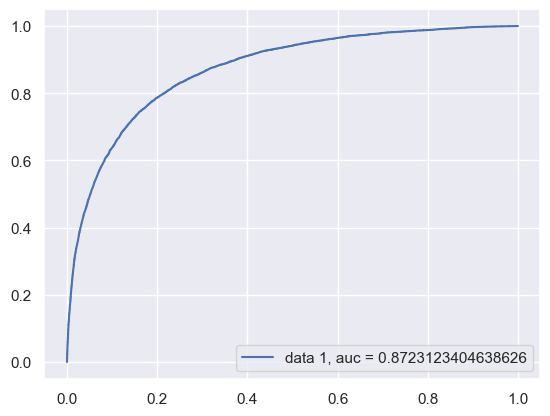

In [19]:
#make predictions
predict_val = model4.predict({
            "CreditScore": X_val[["CreditScore"]],
            "Geography": X_val[["Geography"]],
            "Gender": X_val[["Gender"]],
            "Age": X_val[["Age"]],
            "Tenure": X_val[["Tenure"]],
            "Balance": X_val[["Balance"]],
            "NumOfProducts": X_val[["NumOfProducts"]],
            "HasCrCard": X_val[["HasCrCard"]],
            "IsActiveMember": X_val[["IsActiveMember"]],
            "EstimatedSalary": X_val[["EstimatedSalary"]],
        })

#ROC Curve and AUC
fpr, tpr, _ = metrics.roc_curve(Y_val, predict_val)
auc = metrics.roc_auc_score(Y_val, predict_val)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

#convert probability to labels
predict_val[predict_val <= 0.5] = 0
predict_val[predict_val > 0.5] = 1

#print metrics
print(metrics.classification_report(Y_val, predict_val))

plt.show()

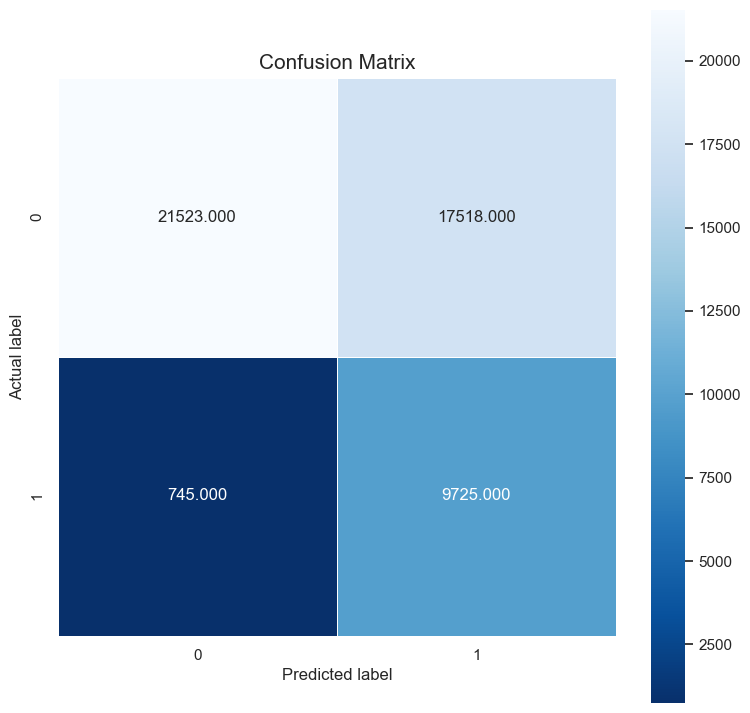

In [20]:
confusion_matrix = metrics.confusion_matrix(Y_val, predict_val)

plt.figure(figsize = (9,9))
sns.heatmap(confusion_matrix, annot = True, fmt = ".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size = 15)

plt.show()

## MNN Experiment 5 (undersampled balanced dataset)

#### Fit and Evaluate

Model: "model3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 CreditScore (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 Geography (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 Gender (InputLayer)            [(None, 1)]          0           []                               
                                                                                                  
 Age (InputLayer)               [(None, 1)]          0           []                               
                                                                                             

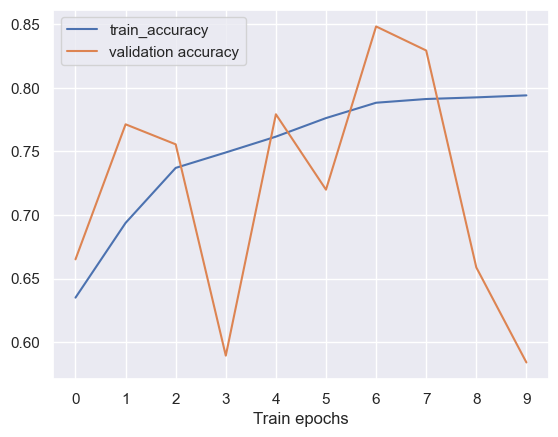

,loss,accuracy,val_loss,val_accuracy
0,0.651119,0.634984,0.607377,0.665085
1,0.579926,0.693734,0.489191,0.771243
2,0.534068,0.736984,0.512354,0.755509
3,0.518090,0.749110,0.758455,0.589384
4,0.498937,0.761544,0.482481,0.779140
5,0.472724,0.776144,0.568588,0.719860
6,0.454083,0.788209,0.365519,0.848175
7,0.447521,0.791133,0.389823,0.829270
8,0.443632,0.792422,0.664852,0.658763
9,0.441590,0.793996,0.825861,0.584032


In [25]:
#build model
model5 = build_model3(optimizer = "SGD", learning_rate = 0.01)
model5.summary()

#fit on train data and evaluate on validation data
history = model5.fit(
    x = {
        "CreditScore": X_train_balanced[["CreditScore"]],
        "Geography": X_train_balanced[["Geography"]],
        "Gender": X_train_balanced[["Gender"]],
        "Age": X_train_balanced[["Age"]],
        "Tenure": X_train_balanced[["Tenure"]],
        "Balance": X_train_balanced[["Balance"]],
        "NumOfProducts": X_train_balanced[["NumOfProducts"]],
        "HasCrCard": X_train_balanced[["HasCrCard"]],
        "IsActiveMember": X_train_balanced[["IsActiveMember"]],
        "EstimatedSalary": X_train_balanced[["EstimatedSalary"]],
    },
    y = Y_train_balanced,
    epochs = num_epochs,
    batch_size = 32,
    validation_data = (
        {
            "CreditScore": X_val[["CreditScore"]],
            "Geography": X_val[["Geography"]],
            "Gender": X_val[["Gender"]],
            "Age": X_val[["Age"]],
            "Tenure": X_val[["Tenure"]],
            "Balance": X_val[["Balance"]],
            "NumOfProducts": X_val[["NumOfProducts"]],
            "HasCrCard": X_val[["HasCrCard"]],
            "IsActiveMember": X_val[["IsActiveMember"]],
            "EstimatedSalary": X_val[["EstimatedSalary"]],
        },
        Y_val),
    verbose = 0)

#print results
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
plt.plot(train_accuracy, label = "train_accuracy")
plt.plot(val_accuracy, label = "validation accuracy")
plt.xticks(range(num_epochs))
plt.xlabel("Train epochs")
plt.legend()
plt.show()

history = pd.DataFrame(history.history)
display(history)

#### Make Predictions and Evaluate on Validation Data

1548/1548 [==============================] - 1s 410us/step
              precision    recall  f1-score   support

           0       0.97      0.49      0.65     39041
           1       0.33      0.95      0.49     10470

    accuracy                           0.58     49511
   macro avg       0.65      0.72      0.57     49511
weighted avg       0.84      0.58      0.62     49511



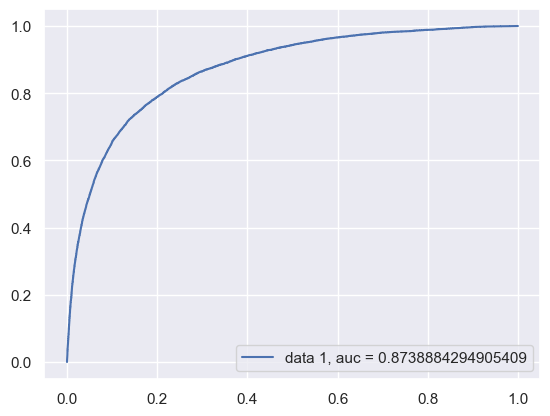

In [26]:
#make predictions
predict_val = model5.predict({
            "CreditScore": X_val[["CreditScore"]],
            "Geography": X_val[["Geography"]],
            "Gender": X_val[["Gender"]],
            "Age": X_val[["Age"]],
            "Tenure": X_val[["Tenure"]],
            "Balance": X_val[["Balance"]],
            "NumOfProducts": X_val[["NumOfProducts"]],
            "HasCrCard": X_val[["HasCrCard"]],
            "IsActiveMember": X_val[["IsActiveMember"]],
            "EstimatedSalary": X_val[["EstimatedSalary"]],
        })

#ROC Curve and AUC
fpr, tpr, _ = metrics.roc_curve(Y_val, predict_val)
auc = metrics.roc_auc_score(Y_val, predict_val)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

#convert probability to labels
predict_val[predict_val <= 0.5] = 0
predict_val[predict_val > 0.5] = 1

#print metrics
print(metrics.classification_report(Y_val, predict_val))

plt.show()

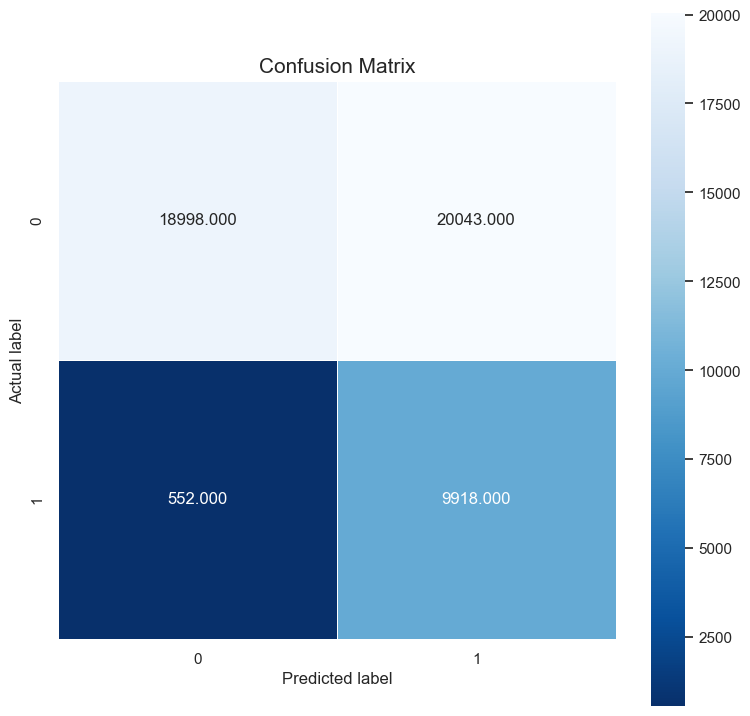

In [27]:
confusion_matrix = metrics.confusion_matrix(Y_val, predict_val)

plt.figure(figsize = (9,9))
sns.heatmap(confusion_matrix, annot = True, fmt = ".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size = 15)

plt.show()

In [28]:
model3.save("../models/mnn_norm_unbalanced.keras")
model4.save("../models/mnn_norm_balanced.keras")